In [1]:
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler,PowerTransformer

In [2]:
import pandas as pd
gym = pd.read_csv("../input/crowdedness-at-the-campus-gym/data.csv")

In [3]:
gym

,number_people,date,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
0,37,2015-08-14 17:00:11-07:00,61211,4,0,0,71.76,0,0,8,17
1,45,2015-08-14 17:20:14-07:00,62414,4,0,0,71.76,0,0,8,17
2,40,2015-08-14 17:30:15-07:00,63015,4,0,0,71.76,0,0,8,17
3,44,2015-08-14 17:40:16-07:00,63616,4,0,0,71.76,0,0,8,17
4,45,2015-08-14 17:50:17-07:00,64217,4,0,0,71.76,0,0,8,17
...,...,...,...,...,...,...,...,...,...,...,...
62179,23,2017-03-18 18:42:28-07:00,67348,5,1,0,61.07,0,1,3,18
62180,21,2017-03-18 18:52:35-07:00,67955,5,1,0,61.07,0,1,3,18
62181,25,2017-03-18 19:02:40-07:00,68560,5,1,0,56.71,0,1,3,19
62182,18,2017-03-18 19:12:47-07:00,69167,5,1,0,56.71,0,1,3,19


In [4]:
gym.describe()

,number_people,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
count,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000
mean,29.072543,45799.437958,2.982504,0.282870,0.002573,58.557108,0.078831,0.660218,7.439824,12.236460
std,22.689026,24211.275891,1.996825,0.450398,0.050660,6.316396,0.269476,0.473639,3.445069,6.717631
min,0.000000,0.000000,0.000000,0.000000,0.000000,38.140000,0.000000,0.000000,1.000000,0.000000
25%,9.000000,26624.000000,1.000000,0.000000,0.000000,55.000000,0.000000,0.000000,5.000000,7.000000
50%,28.000000,46522.500000,3.000000,0.000000,0.000000,58.340000,0.000000,1.000000,8.000000,12.000000
75%,43.000000,66612.000000,5.000000,1.000000,0.000000,62.280000,0.000000,1.000000,10.000000,18.000000
max,145.000000,86399.000000,6.000000,1.000000,1.000000,87.170000,1.000000,1.000000,12.000000,23.000000


In [5]:
gym.corr()

,number_people,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
number_people,1.000000,0.550218,-0.162062,-0.173958,-0.048249,0.373327,0.182683,0.335350,-0.097854,0.552049
timestamp,0.550218,1.000000,-0.001793,-0.000509,0.002851,0.184849,0.009551,0.044676,-0.023221,0.999077
day_of_week,-0.162062,-0.001793,1.000000,0.791338,-0.075862,0.011169,-0.011782,-0.004824,0.015559,-0.001914
is_weekend,-0.173958,-0.000509,0.791338,1.000000,-0.031899,0.020673,-0.016646,-0.036127,0.008462,-0.000517
is_holiday,-0.048249,0.002851,-0.075862,-0.031899,1.000000,-0.088527,-0.014858,-0.070798,-0.094942,0.002843
temperature,0.373327,0.184849,0.011169,0.020673,-0.088527,1.000000,0.093242,0.152476,0.063125,0.185121
is_start_of_semester,0.182683,0.009551,-0.011782,-0.016646,-0.014858,0.093242,1.000000,0.209862,-0.137160,0.010091
is_during_semester,0.335350,0.044676,-0.004824,-0.036127,-0.070798,0.152476,0.209862,1.000000,0.096556,0.045581
month,-0.097854,-0.023221,0.015559,0.008462,-0.094942,0.063125,-0.137160,0.096556,1.000000,-0.023624
hour,0.552049,0.999077,-0.001914,-0.000517,0.002843,0.185121,0.010091,0.045581,-0.023624,1.000000


In [6]:
gym

,number_people,date,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
0,37,2015-08-14 17:00:11-07:00,61211,4,0,0,71.76,0,0,8,17
1,45,2015-08-14 17:20:14-07:00,62414,4,0,0,71.76,0,0,8,17
2,40,2015-08-14 17:30:15-07:00,63015,4,0,0,71.76,0,0,8,17
3,44,2015-08-14 17:40:16-07:00,63616,4,0,0,71.76,0,0,8,17
4,45,2015-08-14 17:50:17-07:00,64217,4,0,0,71.76,0,0,8,17
...,...,...,...,...,...,...,...,...,...,...,...
62179,23,2017-03-18 18:42:28-07:00,67348,5,1,0,61.07,0,1,3,18
62180,21,2017-03-18 18:52:35-07:00,67955,5,1,0,61.07,0,1,3,18
62181,25,2017-03-18 19:02:40-07:00,68560,5,1,0,56.71,0,1,3,19
62182,18,2017-03-18 19:12:47-07:00,69167,5,1,0,56.71,0,1,3,19


In [7]:
date = gym['date']

In [8]:
new_date = date.str[:-6] # all values everything except last six values


In [9]:
from datetime import datetime
pandas_date = pd.to_datetime(new_date)

In [10]:
gym.drop(columns = 'date',inplace = True)

In [11]:
gym['date'] = pandas_date

/opt/conda/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


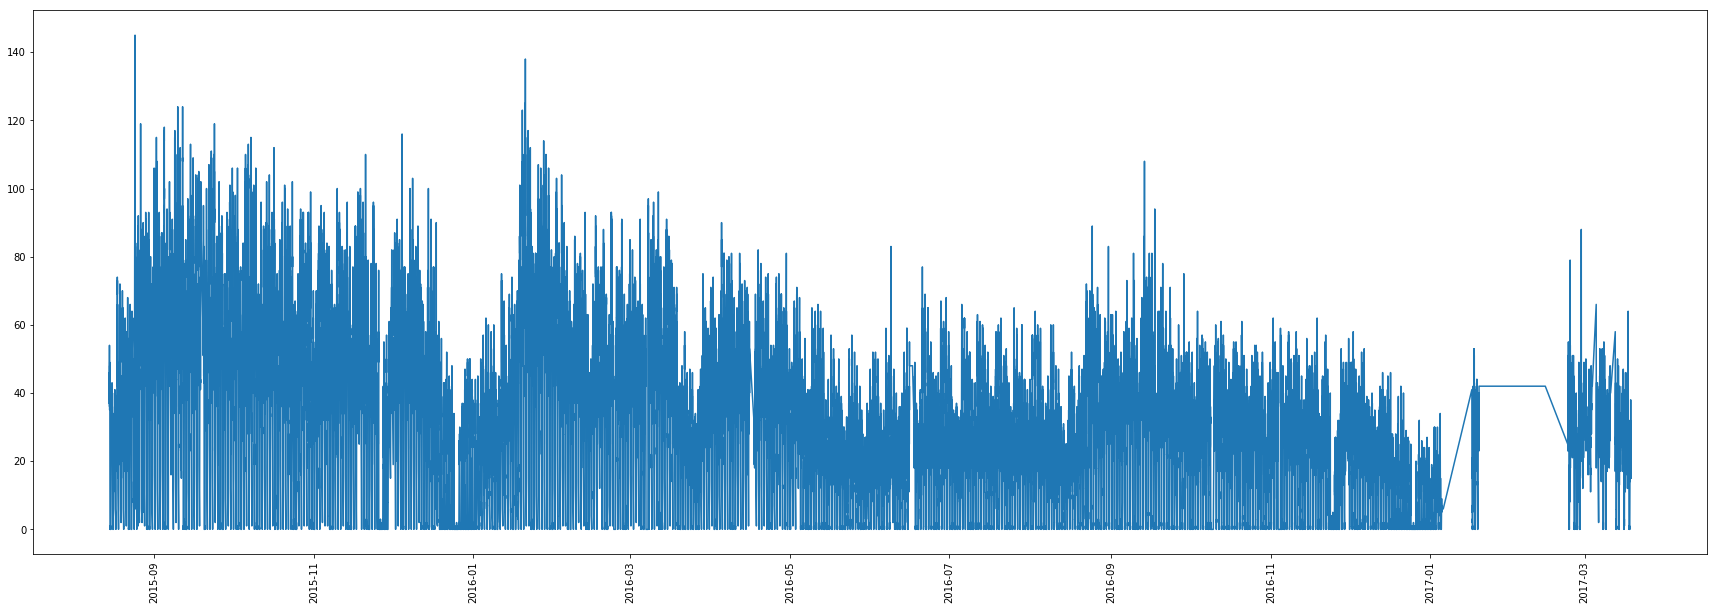

In [12]:
plt.figure(figsize = (30,10))
plt.plot(gym['date'],gym['number_people'])
plt.xticks(rotation = 90)
plt.show()

In [13]:
ts = pd.Series(gym['number_people'].tolist(),index = pandas_date)

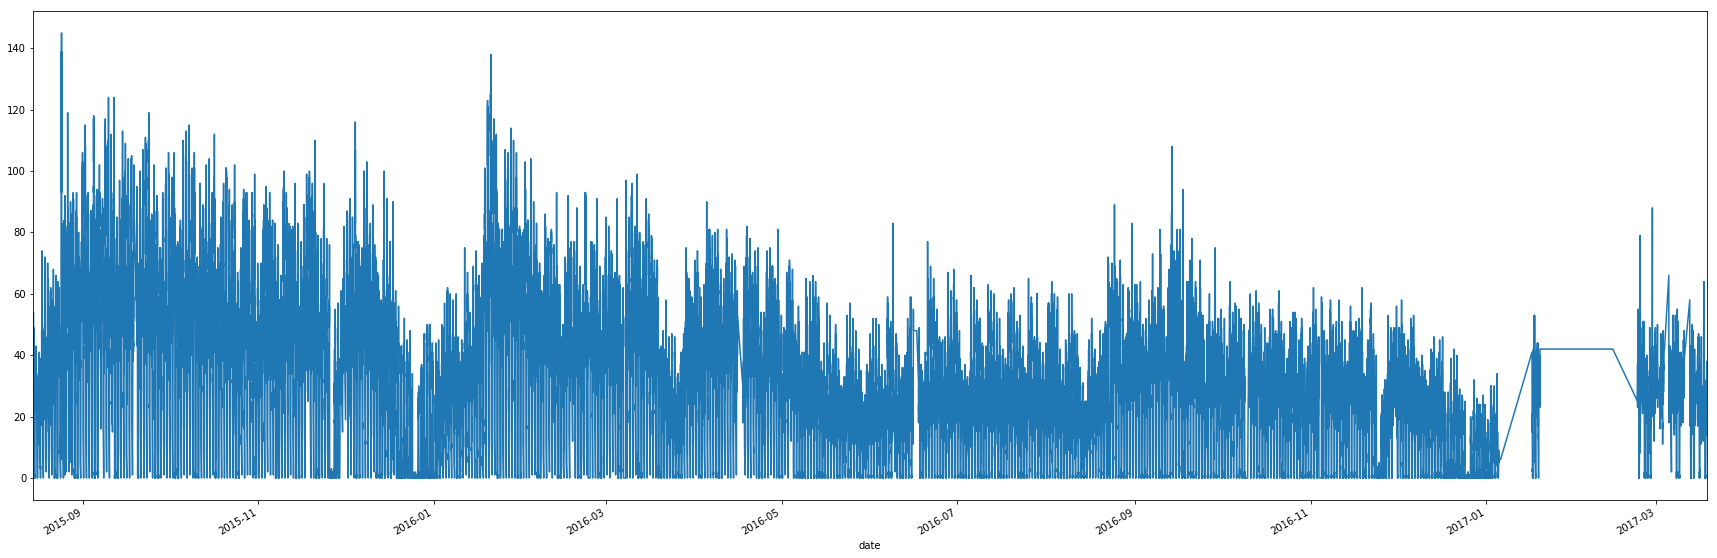

In [14]:
plt.figure(figsize = (30,10))
ts.plot()

In [15]:
ts['2015-08':'2016-08'].head()

date
2015-08-14 17:00:11    37
2015-08-14 17:20:14    45
2015-08-14 17:30:15    40
2015-08-14 17:40:16    44
2015-08-14 17:50:17    45
dtype: int64

In [16]:
ts['2015-08':'2016-08'].tail()

date
2016-08-31 23:14:50    39
2016-08-31 23:24:51    34
2016-08-31 23:34:53    31
2016-08-31 23:44:54    25
2016-08-31 23:54:55    36
dtype: int64

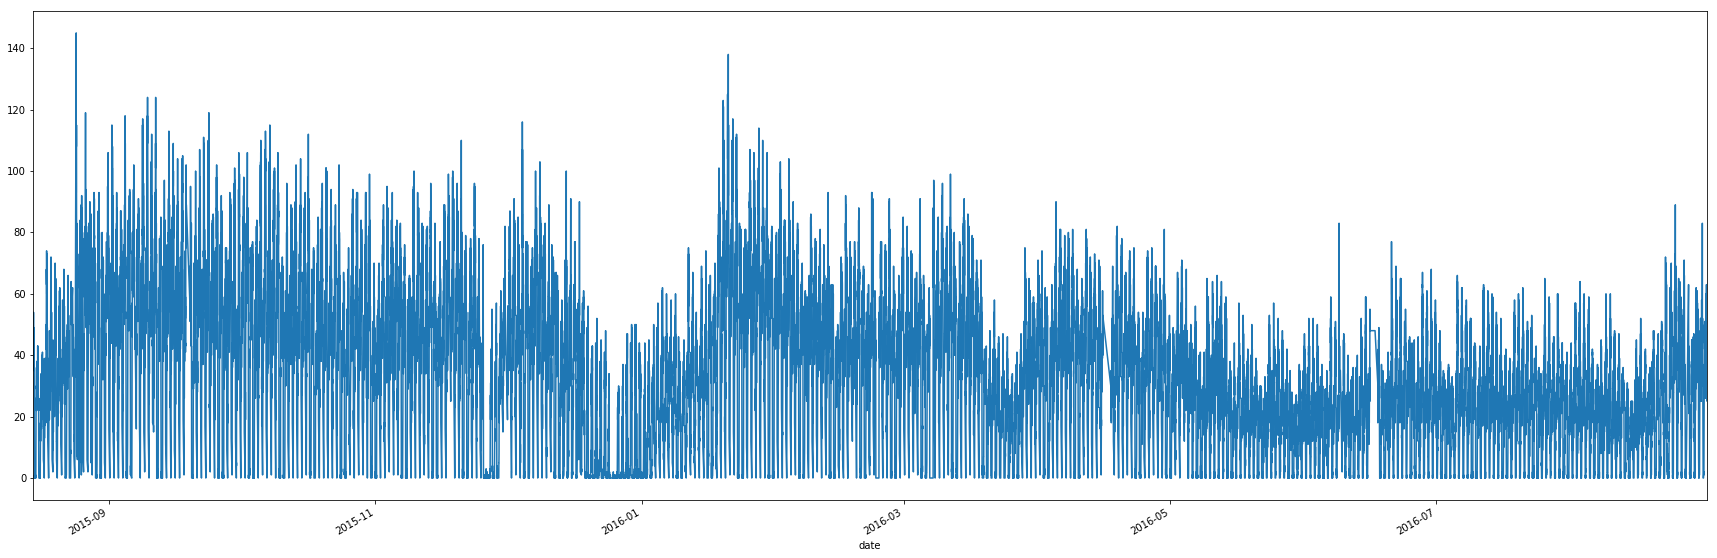

In [17]:
plt.figure(figsize = (30,10))
ts['2015-08':'2016-08'].plot()
plt.show()

In [18]:
#assuming gym is open in between 6 and 12
ts.between_time('06:00','23:59')
print(len(ts.between_time('06:00','23:59')))

50487


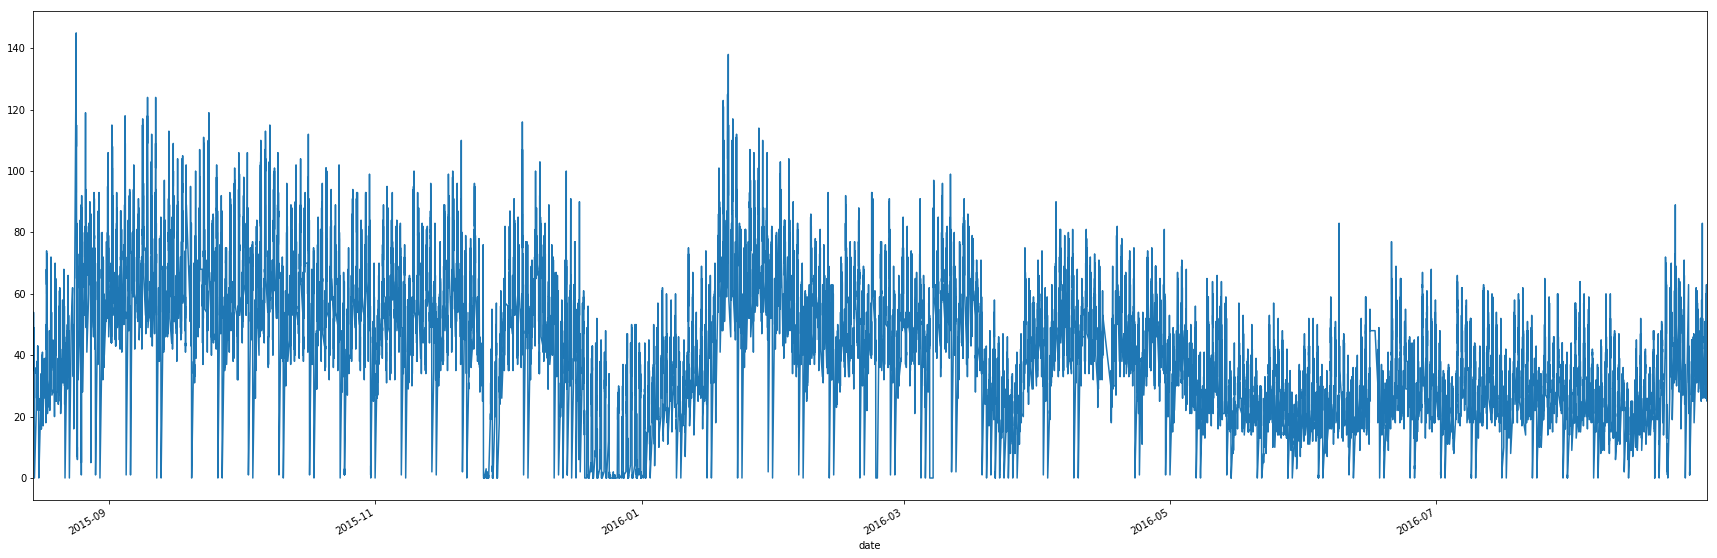

In [19]:
plt.figure(figsize = (30,10))
ts['2015-08':'2016-08'].between_time('10:00','23:59').plot()
plt.show()

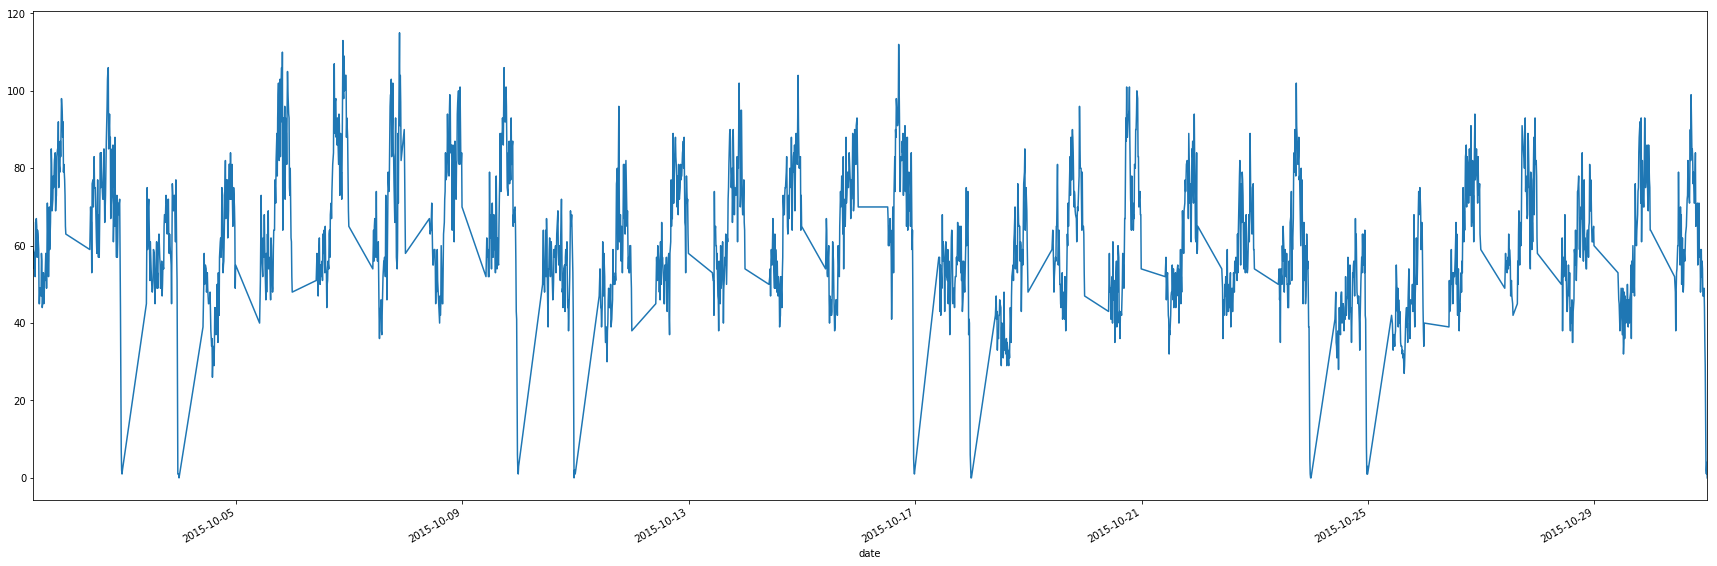

In [20]:
#lets filter it by only month say october where it is between start of midterm and final exam
plt.figure(figsize = (30,10))
ts['2015-10-01':'2015-10-30'].between_time('10:00','23:59').plot()

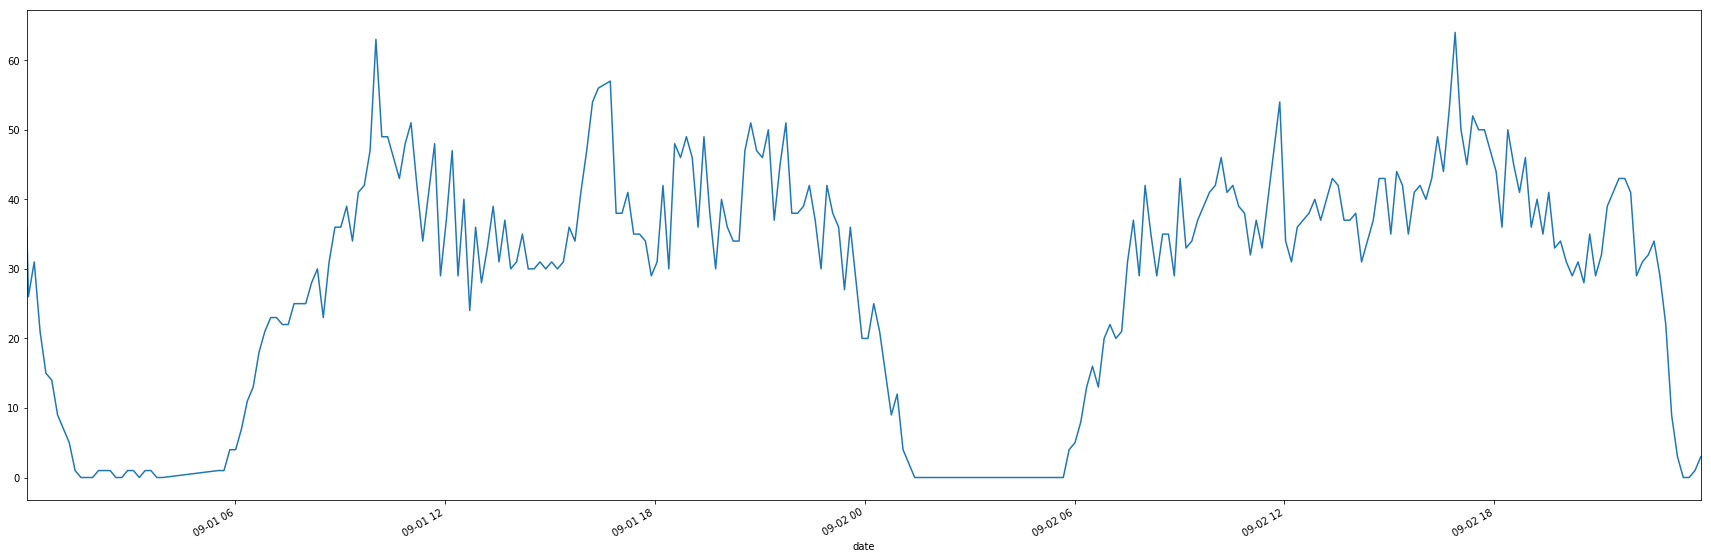

In [21]:
plt.figure(figsize = (30,10))
ts['2016-09-01':'2016-09-02'].plot()

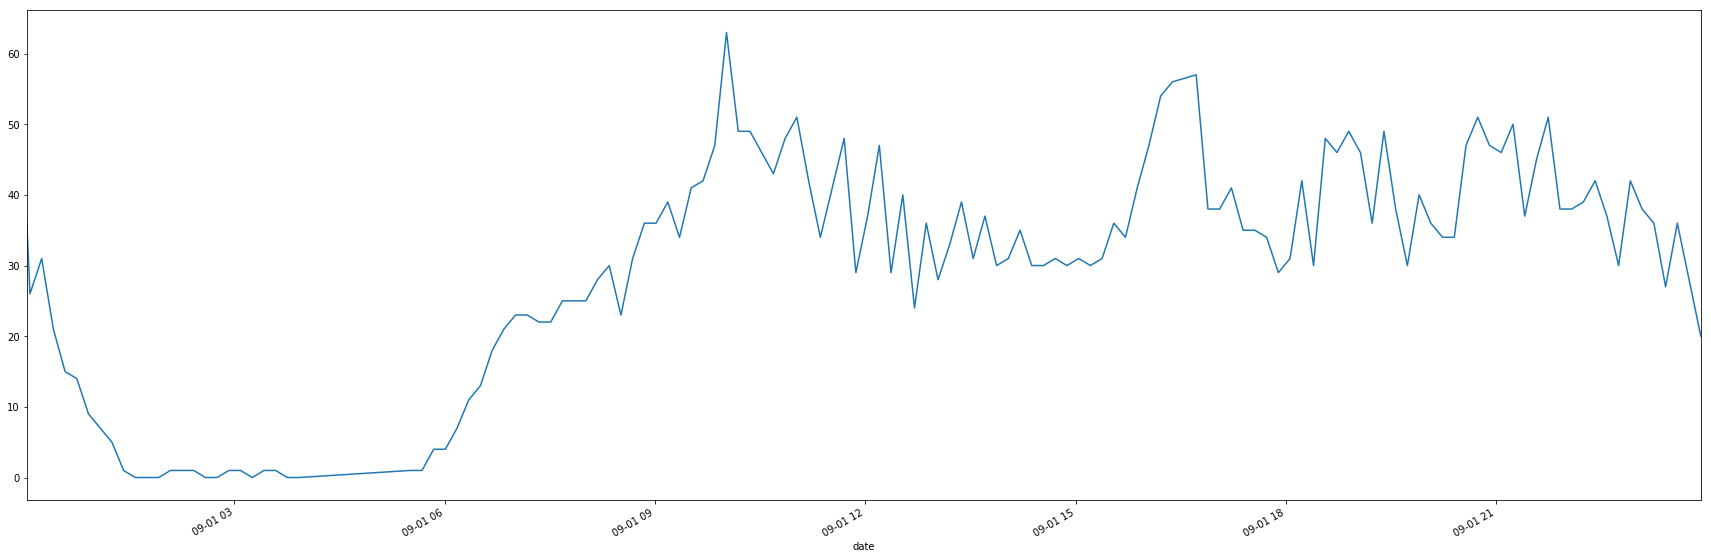

In [22]:
plt.figure(figsize = (30,10))
ts['2016-09-01 00:00:00':'2016-09-01 23:59:59'].plot()

In [23]:
ts_df = pd.DataFrame(ts).reset_index().rename(columns = {0:'people'})

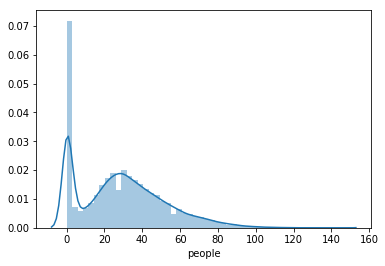

In [24]:
sns.distplot(ts_df['people'])

In [25]:
gym.set_index('date',inplace=True)

In [26]:
gym['2016-09':'2016-12-31 18:00:00']

,number_people,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
date,,,,,,,,,,
2016-09-01 00:02:16,36,136,3,0,0,59.54,1,1,9,0
2016-09-01 00:04:57,26,297,3,0,0,59.54,1,1,9,0
2016-09-01 00:14:59,31,899,3,0,0,59.54,1,1,9,0
2016-09-01 00:25:00,21,1500,3,0,0,59.54,1,1,9,0
2016-09-01 00:35:01,15,2101,3,0,0,59.54,1,1,9,0
...,...,...,...,...,...,...,...,...,...,...
2016-12-31 17:19:20,10,62360,5,1,0,49.02,0,0,12,17
2016-12-31 17:29:23,9,62963,5,1,0,49.02,0,0,12,17
2016-12-31 17:39:24,11,63564,5,1,0,49.02,0,0,12,17


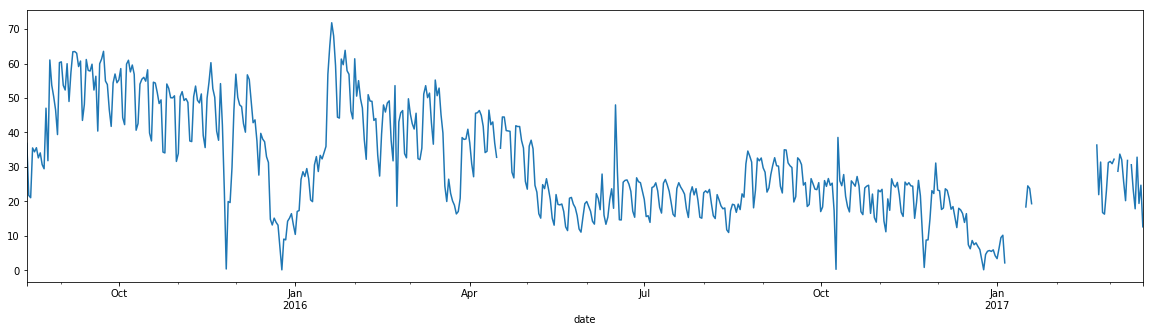

In [27]:
#resample by daily average
plt.figure(figsize = (20,5))
gym['number_people'].resample('D').mean().plot()

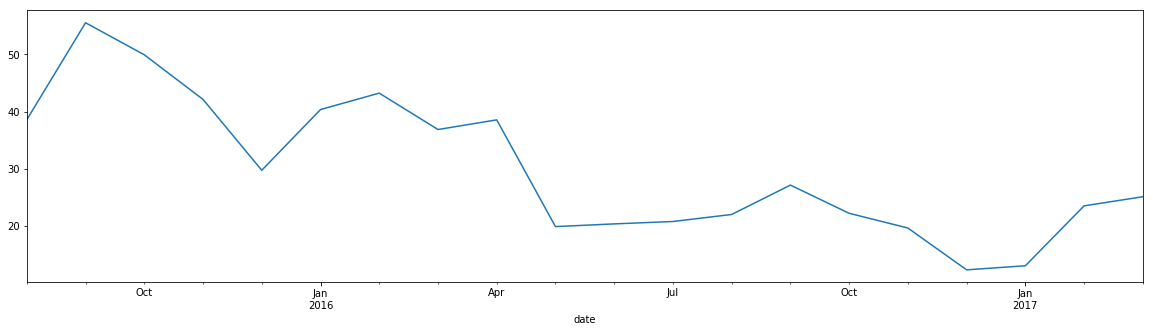

In [28]:
plt.figure(figsize = (20,5))
gym['number_people'].resample('M').mean().plot()

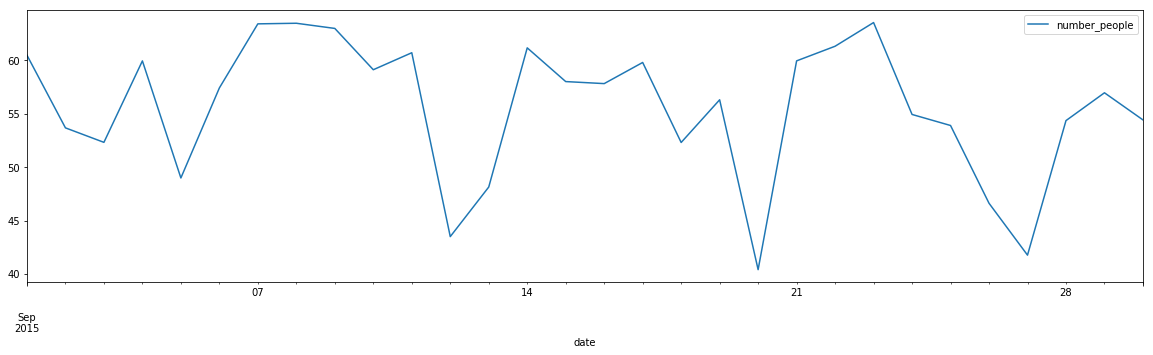

In [29]:
#monthly trend september
gym[['number_people']].loc['2015-09-01':'2015-09-30'].resample('D').mean().plot(figsize = (20,5))
plt.show()

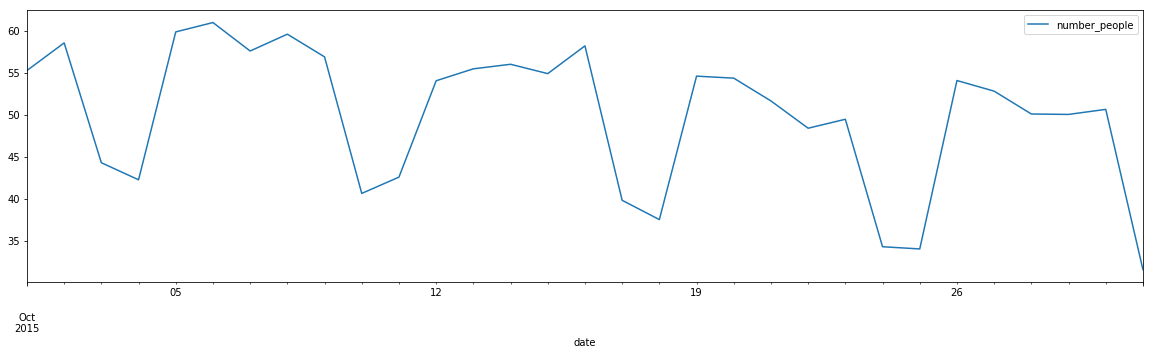

In [30]:
#monthly trend 
gym[['number_people']].loc['2015-10-01':'2015-10-31'].resample('D').mean().plot(figsize = (20,5))
plt.show()

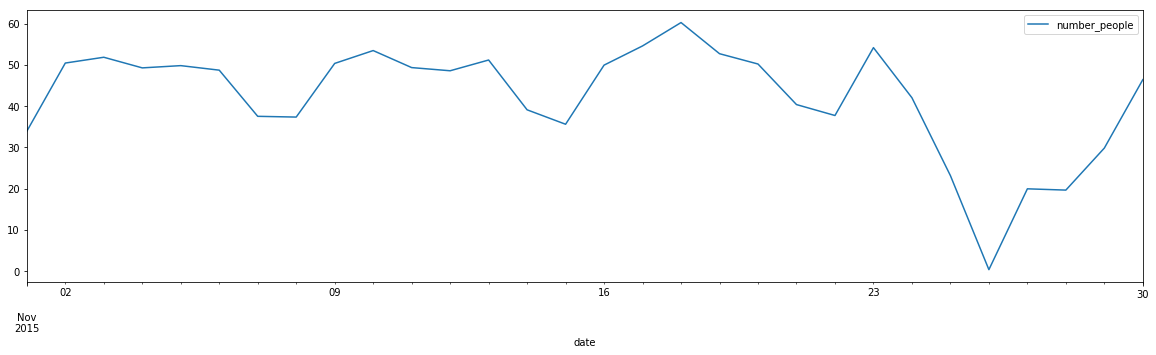

In [31]:
#monthly trend december
gym[['number_people']].loc['2015-11-01':'2015-11-30'].resample('D').mean().plot(figsize = (20,5))
plt.show()

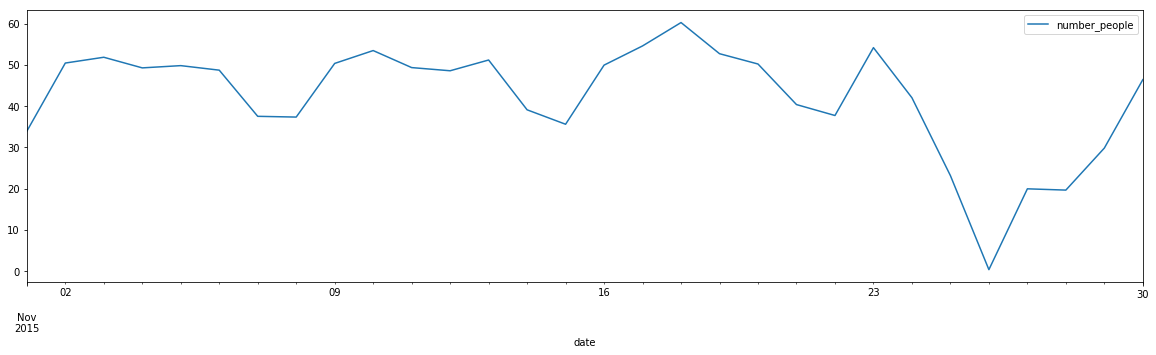

In [32]:
gym[['number_people']].loc['2015-11-01':'2015-11-30'].resample('D').mean().plot(figsize = (20,5))
plt.show()

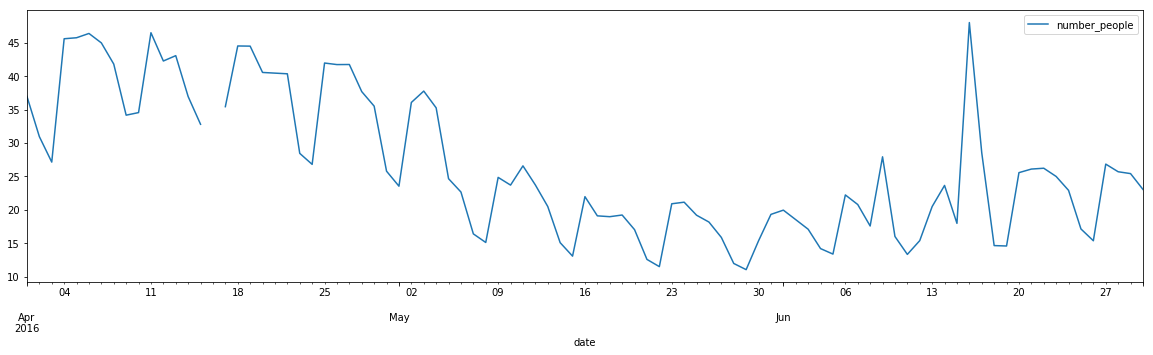

In [33]:
gym[['number_people']].loc['2016-04':'2016-06'].resample('D').mean().plot(figsize = (20,5))

lets get the summary of all the above predictons

In [34]:
gym.columns

Index(['number_people', 'timestamp', 'day_of_week', 'is_weekend', 'is_holiday',
       'temperature', 'is_start_of_semester', 'is_during_semester', 'month',
       'hour'],
      dtype='object')

In [35]:
array = ['number_people', 'is_weekend', 'is_holiday','is_start_of_semester', 'is_during_semester']
for val in array:
    print(val,'length is:',gym[val].sum())

number_people length is: 1807847
is_weekend length is: 17590
is_holiday length is: 160
is_start_of_semester length is: 4902
is_during_semester length is: 41055


In [36]:
print('the mean temp is : ',gym['temperature'].mean())
print('the median of temp is : ',gym['temperature'].median())
print('the min temp is : ',gym['temperature'].min())
print('the max temp is : ',gym['temperature'].max())

the mean temp is :  58.557107937734656
the median of temp is :  58.34
the min temp is :  38.14
the max temp is :  87.17


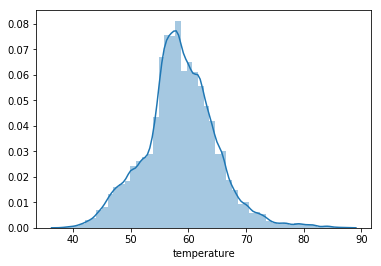

In [37]:
#lets observe correlation between attendance and temperature
sns.distplot(gym['temperature'])
plt.show()

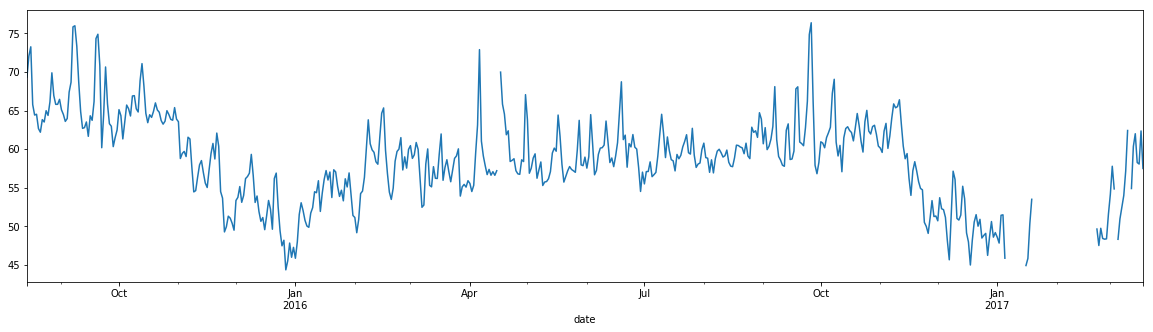

In [38]:
#daywise temperature
gym['temperature'].resample('D').mean().plot(figsize = (20,5))
plt.show()

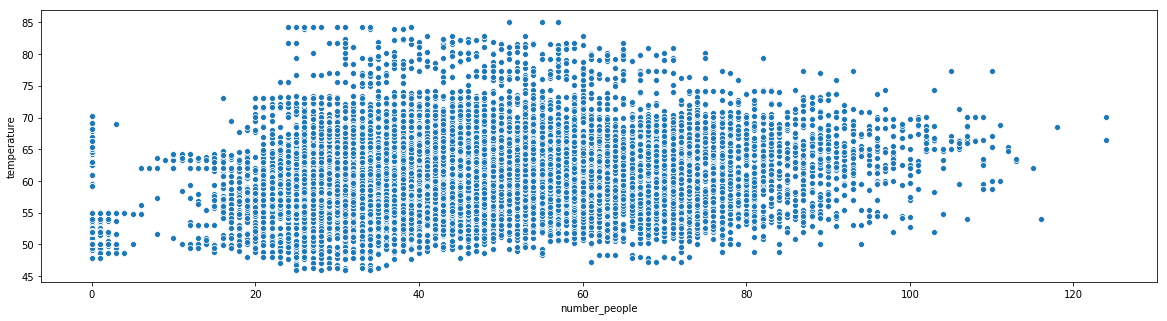

In [39]:
plt.figure(figsize = (20,5))
temp = gym[(gym['is_holiday'] == 0) & (gym['is_during_semester'] == 1) &(gym['is_weekend'] == 0) & (gym['is_start_of_semester'] == 0)].between_time('10:00','22:00')
sns.scatterplot(data = temp['2015':'2016'],x='number_people',y='temperature')

In [40]:
#actual pca
w = 6.5
feels_like = lambda w, t: int(13.12+(0.615*float(t))-(11.37*(float(w)*3.6)**0.16)+(0.3965*float(t))*((float(w)*3.6)**0.16))




In [41]:
gym['temperature'] = gym['temperature'].apply(lambda x : (x - 32)*(5/9))


In [42]:
gym['apparent_temperature'] = gym['temperature'].apply(lambda t: int(13.12+(0.615*float(t))-(11.37*(float(6.5)*3.6)**0.16)+(0.3965*float(t))*((float(6.5)*3.6)**0.16)))

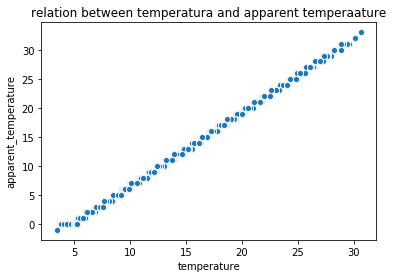

In [43]:
sns.scatterplot(gym['temperature'],gym['apparent_temperature'])
plt.title('relation between temperatura and apparent temperaature')
plt.show()


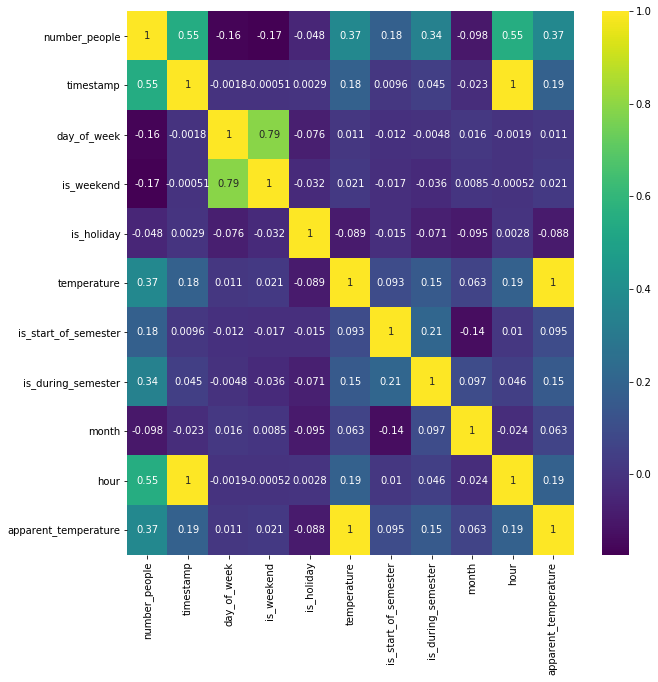

In [44]:
plt.figure(figsize = (10,10))
sns.heatmap(gym.corr(),vmax=1,annot=True,cmap='viridis',)
plt.show()

In [45]:
from sklearn.preprocessing import StandardScaler
X = gym.iloc[:,1:]
y = gym['number_people'].values.reshape(-1,1)
X = StandardScaler().fit_transform(X)


In [46]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit_transform(X)

array([[-2.53201684e+00, -1.03079385e-01, -7.72915562e-01, ...,
         8.72898642e-01,  1.66395456e-02, -5.23283845e-02],
       [-2.55518607e+00, -9.67191589e-02, -7.47619825e-01, ...,
         8.72887046e-01,  1.65677757e-02, -1.71952071e-02],
       [-2.56676106e+00, -9.35416892e-02, -7.34982470e-01, ...,
         8.72881252e-01,  1.65319205e-02,  3.56779240e-04],
       ...,
       [-6.85961845e-01, -1.41741318e+00,  1.70711664e+00, ...,
        -4.38618071e-01, -4.08314338e-02, -4.64741449e-02],
       [-6.97652390e-01, -1.41420399e+00,  1.71988016e+00, ...,
        -4.38623922e-01, -4.08676469e-02, -2.87469307e-02],
       [-7.09285156e-01, -1.41101066e+00,  1.73258059e+00, ...,
        -4.38629745e-01, -4.09036810e-02, -1.11073305e-02]])

Text(0, 0.5, 'Explained variance ratio')

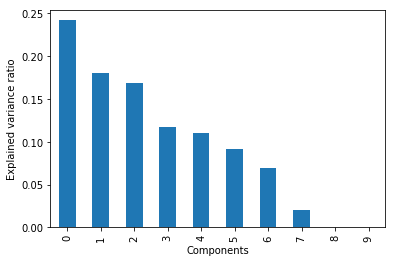

In [47]:
plt.style.context('dark_background')
pd.Series(pca.explained_variance_ratio_).plot(kind = 'bar')
plt.xlabel('Components')
plt.ylabel('Explained variance ratio')
#first two components constitute almost 45% of the variance the sast component is least important so we drop it

In [48]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 5)
X = pca.fit_transform(X)

In [49]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

In [50]:
X_train.shape
from sklearn.metrics import r2_score

In [51]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor()
reg.fit(X_train,y_train)
pred = reg.predict(X_test)
print(r2_score(pred,y_test))
print(reg.score(X_test,y_test))

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.8981331867213426
0.907606859802614


In [52]:
arr = np.arange(10,300,30).tolist()
arr.append(1000)
arr.append(500)
param_grid_reg = {
    'bootstrap':[True],
    'max_depth':[80,90,100,110],
    'max_features':['auto','sqrt'],
    'min_samples_split':[2,3,8,11,5],
    'min_samples_leaf':[3,4,5],
    'n_estimators':arr
}

In [53]:
reg = RandomForestRegressor()

grid_search_reg = GridSearchCV(reg,param_grid_reg,cv=6,n_jobs=-1,verbose=2)
grid_search_reg.fit(X_train,y_train)

NameError: name 'GridSearchCV' is not defined

In [54]:
grid_search_reg.best_params_

NameError: name 'grid_search_reg' is not defined

In [55]:
best_random_forest_regressor = grid_search_reg.best_estimators_
best_random_forest_regressor.fit(X_train,y_train)
y_pred = best_random_forest_regressor.predict(X_test)
r2_score(y_test,y_pred)

NameError: name 'grid_search_reg' is not defined